In [1]:
import pynndescent
import numpy as np
import h5py
from urllib.request import urlretrieve
import os

In [2]:
def get_ann_benchmark_data(dataset_name):
    if not os.path.exists(f"{dataset_name}.hdf5"):
        print(f"Dataset {dataset_name} is not cached; downloading now ...")
        urlretrieve(f"http://ann-benchmarks.com/{dataset_name}.hdf5", f"{dataset_name}.hdf5")
    hdf5_file = h5py.File(f"{dataset_name}.hdf5", "r")
    return np.array(hdf5_file['train']), np.array(hdf5_file['test']), hdf5_file.attrs['distance']

In [3]:
fmnist_train, fmnist_test, _ = get_ann_benchmark_data('fashion-mnist-784-euclidean')

Dataset fashion-mnist-784-euclidean is not cached; downloading now ...


In [51]:
print(fmnist_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
%%time
index = pynndescent.NNDescent(fmnist_train)

CPU times: total: 59.5 s
Wall time: 27.3 s


In [5]:
fmnist_train.shape

(60000, 784)

In [6]:
%%time
neighbors = index.query(fmnist_test[:10])

CPU times: total: 13.3 s
Wall time: 19.6 s


In [7]:
%%time
index = pynndescent.NNDescent(fmnist_train)
index.prepare()

CPU times: total: 53.1 s
Wall time: 9.9 s


In [8]:
%%time
neighbors = index.query(fmnist_test)

CPU times: total: 906 ms
Wall time: 1.48 s


In [10]:
%%time
index = pynndescent.NNDescent(fmnist_train)
neighbors = index.query(fmnist_test[:10])

CPU times: total: 51.6 s
Wall time: 9.77 s


In [12]:
%%time
neighbors = index.query(fmnist_test)

CPU times: total: 656 ms
Wall time: 830 ms


In [14]:
from sklearn.neighbors import KDTree

In [16]:
%%time
tree_index = KDTree(fmnist_train)

CPU times: total: 8.53 s
Wall time: 11.3 s


In [18]:
%%time
tree_neighbors = tree_index.query(fmnist_test, k=10)

CPU times: total: 10min 58s
Wall time: 14min 50s


In [19]:
def accuracy_per_query_point(approx_neighbors, true_neighbors):
    approx_indices = approx_neighbors[0]
    true_indices = true_neighbors[1]
    result = np.zeros(approx_indices.shape[0])
    for i in range(approx_indices.shape[0]):
        n_correct = np.intersect1d(approx_indices[i], true_indices[i]).shape[0]
        result[i] = n_correct / true_indices.shape[1]
    return result

In [20]:
accuracy_stats = accuracy_per_query_point(neighbors, tree_neighbors)

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(10,6)})

C:\Users\binweiwu\AppData\Local\Temp\ipykernel_21544\2840143298.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(accuracy_stats, kde=False)


Average accuracy of 0.9775


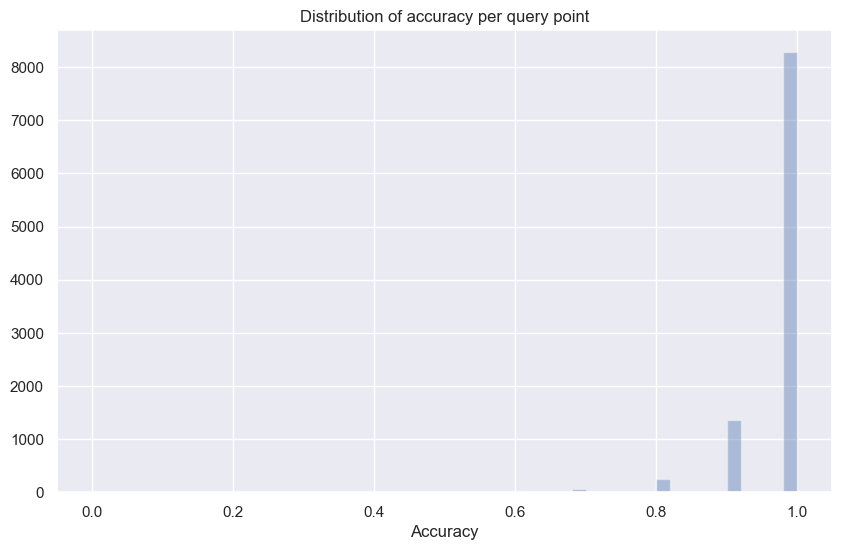

In [24]:
sns.distplot(accuracy_stats, kde=False)
plt.title("Distribution of accuracy per query point")
plt.xlabel("Accuracy")
print(f"Average accuracy of {np.mean(accuracy_stats)}")

In [26]:
%%time
more_neighbors = index.query(fmnist_test, k=15)

CPU times: total: 812 ms
Wall time: 1.14 s


C:\Users\binweiwu\AppData\Local\Temp\ipykernel_21544\1475076476.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(more_accuracy_stats, kde=False)


Average accuracy of 0.99011


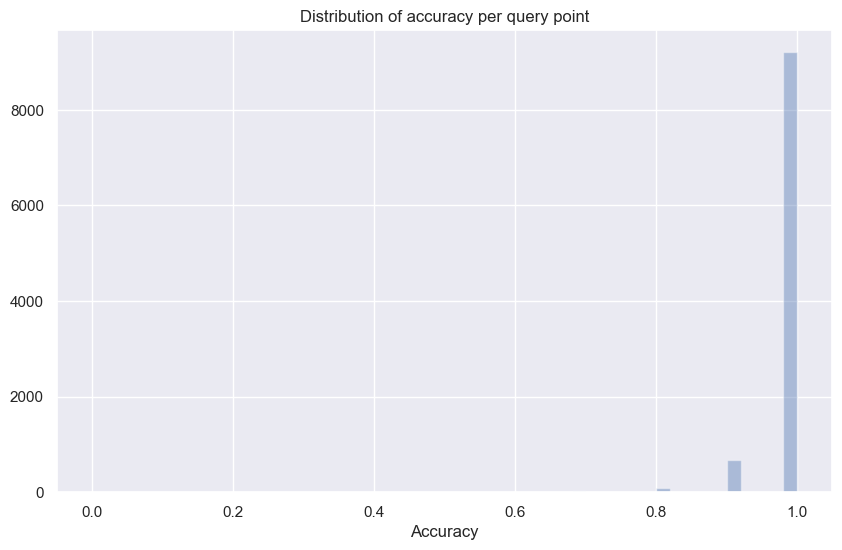

In [27]:
more_accuracy_stats = accuracy_per_query_point(more_neighbors, tree_neighbors)
sns.distplot(more_accuracy_stats, kde=False)
plt.title("Distribution of accuracy per query point")
plt.xlabel("Accuracy")
print(f"Average accuracy of {np.mean(more_accuracy_stats)}")

In [28]:
%%time
better_neighbors = index.query(fmnist_test, epsilon=0.2)

CPU times: total: 1.11 s
Wall time: 1.54 s


C:\Users\binweiwu\AppData\Local\Temp\ipykernel_21544\2323882149.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(better_accuracy_stats, kde=False)


Average accuracy of 0.9965799999999999


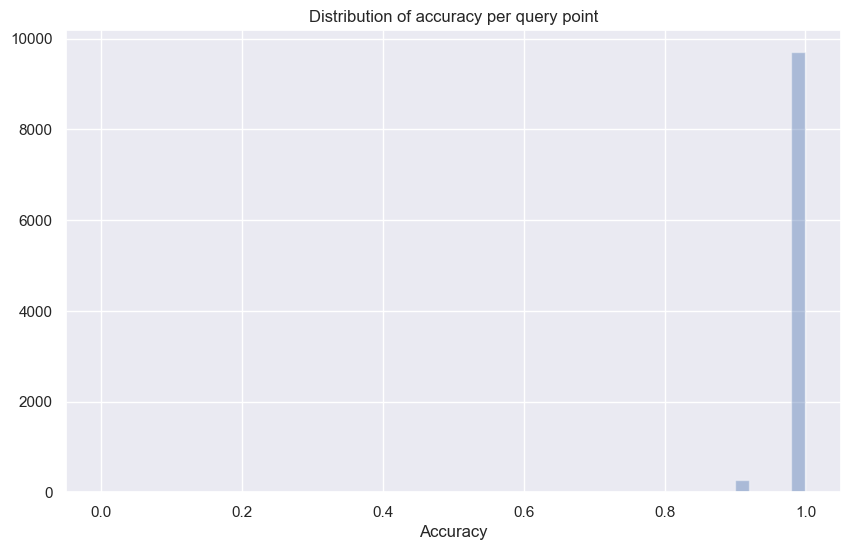

In [29]:
better_accuracy_stats = accuracy_per_query_point(better_neighbors, tree_neighbors)
sns.distplot(better_accuracy_stats, kde=False)
plt.title("Distribution of accuracy per query point")
plt.xlabel("Accuracy")
print(f"Average accuracy of {np.mean(better_accuracy_stats)}")

In [30]:
%%time
worse_neighbors = index.query(fmnist_test, epsilon=0.0)

CPU times: total: 391 ms
Wall time: 525 ms


C:\Users\binweiwu\AppData\Local\Temp\ipykernel_21544\729942210.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(worse_accuracy_stats, kde=False)


Average accuracy of 0.8886700000000001


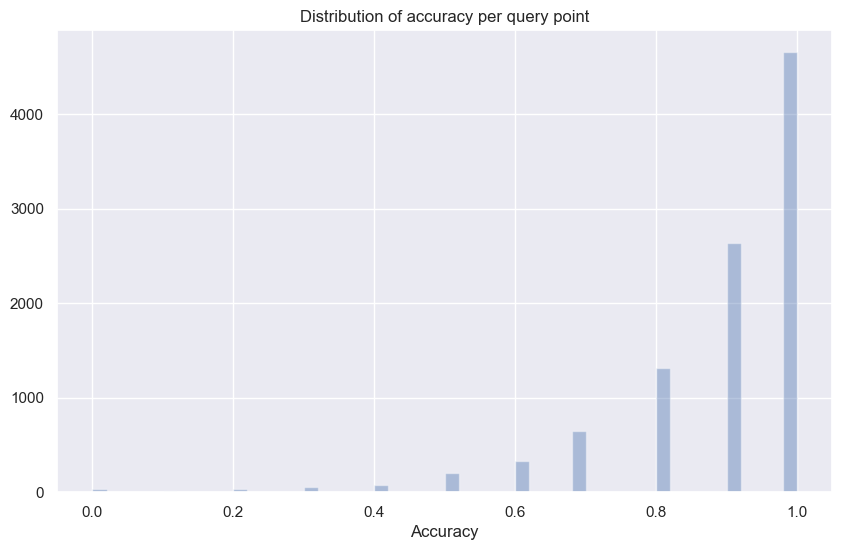

In [31]:
worse_accuracy_stats = accuracy_per_query_point(worse_neighbors, tree_neighbors)
sns.distplot(worse_accuracy_stats, kde=False)
plt.title("Distribution of accuracy per query point")
plt.xlabel("Accuracy")
print(f"Average accuracy of {np.mean(worse_accuracy_stats)}")

In [32]:
%%time
accurate_index = pynndescent.NNDescent(fmnist_train, n_neighbors=50)
accurate_index.prepare()

CPU times: total: 1min 23s
Wall time: 17.2 s


In [33]:
%%time
accurate_neighbors = accurate_index.query(fmnist_test, epsilon=0.2)

CPU times: total: 1.27 s
Wall time: 1.72 s


C:\Users\binweiwu\AppData\Local\Temp\ipykernel_21544\3984048242.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(acc_index_accuracy_stats, kde=False)


Average accuracy of 0.99821


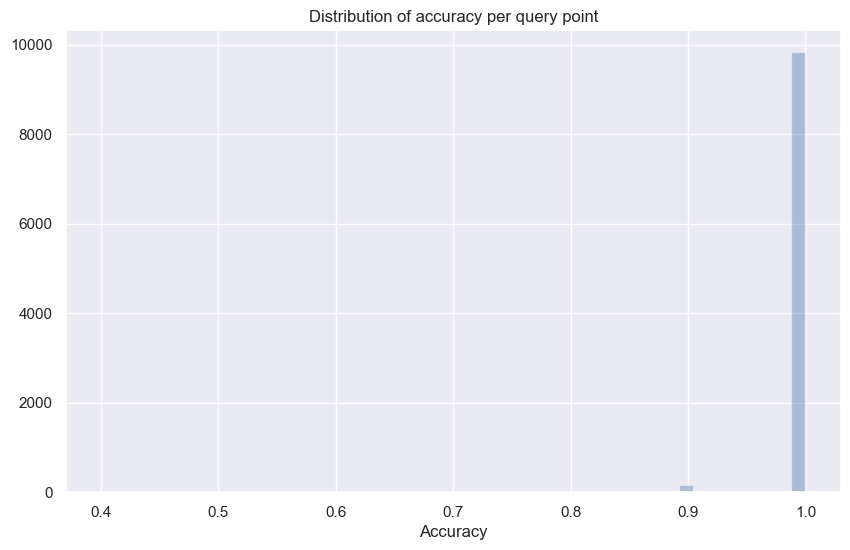

In [34]:
acc_index_accuracy_stats = accuracy_per_query_point(accurate_neighbors, tree_neighbors)
sns.distplot(acc_index_accuracy_stats, kde=False)
plt.title("Distribution of accuracy per query point")
plt.xlabel("Accuracy")
print(f"Average accuracy of {np.mean(acc_index_accuracy_stats)}")

In [35]:
%%time
fast_index = pynndescent.NNDescent(fmnist_train, n_neighbors=5)
fast_index.prepare()

D:\Apps\anaconda3\Lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


CPU times: total: 19.5 s
Wall time: 10.1 s


In [36]:
%%time
fast_neighbors = fast_index.query(fmnist_test, epsilon=0.0)

CPU times: total: 156 ms
Wall time: 299 ms


C:\Users\binweiwu\AppData\Local\Temp\ipykernel_21544\3279176098.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fast_index_accuracy_stats, kde=False)


Average accuracy of 0.64386


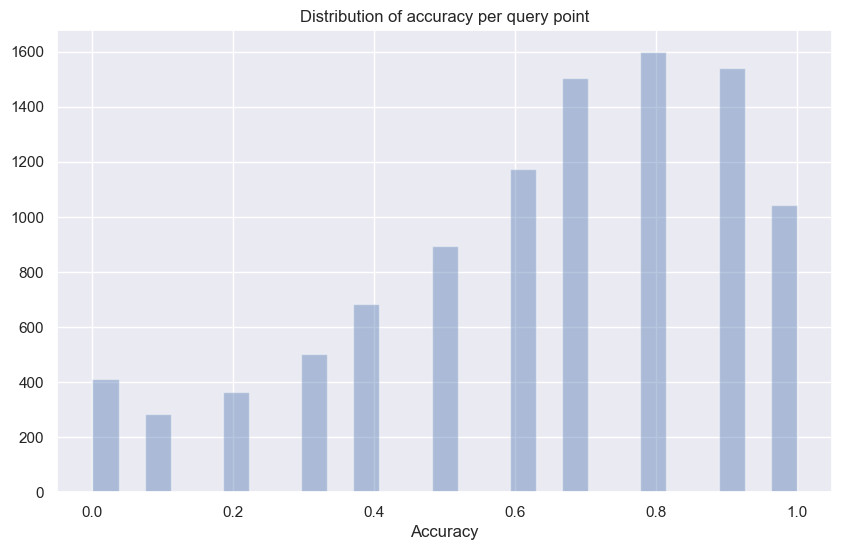

In [38]:
fast_index_accuracy_stats = accuracy_per_query_point(fast_neighbors, tree_neighbors)
sns.distplot(fast_index_accuracy_stats, kde=False)
plt.title("Distribution of accuracy per query point")
plt.xlabel("Accuracy")
print(f"Average accuracy of {np.mean(fast_index_accuracy_stats)}")

In [39]:
%%time
accurate_index = pynndescent.NNDescent(fmnist_train, n_neighbors=50, diversify_prob=0.0)
accurate_index.prepare()

CPU times: total: 2min 2s
Wall time: 19.7 s


In [40]:
%%time
accurate_neighbors = accurate_index.query(fmnist_test, epsilon=0.2)

CPU times: total: 2.58 s
Wall time: 3.51 s


C:\Users\binweiwu\AppData\Local\Temp\ipykernel_21544\3984048242.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(acc_index_accuracy_stats, kde=False)


Average accuracy of 0.9999300000000001


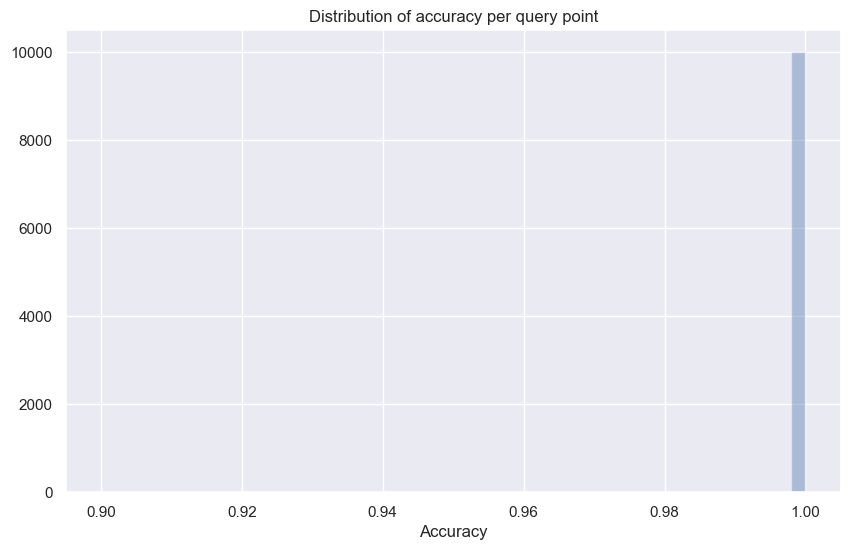

In [41]:
acc_index_accuracy_stats = accuracy_per_query_point(accurate_neighbors, tree_neighbors)
sns.distplot(acc_index_accuracy_stats, kde=False)
plt.title("Distribution of accuracy per query point")
plt.xlabel("Accuracy")
print(f"Average accuracy of {np.mean(acc_index_accuracy_stats)}")

In [42]:
%%time
accurate_index = pynndescent.NNDescent(
    fmnist_train,
    n_neighbors=50,
    diversify_prob=0.0,
    pruning_degree_multiplier=3.0
)
accurate_index.prepare()

CPU times: total: 2min 2s
Wall time: 20.5 s


In [43]:
%%time
accurate_neighbors = accurate_index.query(fmnist_test, epsilon=0.2)

CPU times: total: 3.05 s
Wall time: 4.49 s


C:\Users\binweiwu\AppData\Local\Temp\ipykernel_21544\3984048242.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(acc_index_accuracy_stats, kde=False)


Average accuracy of 1.0


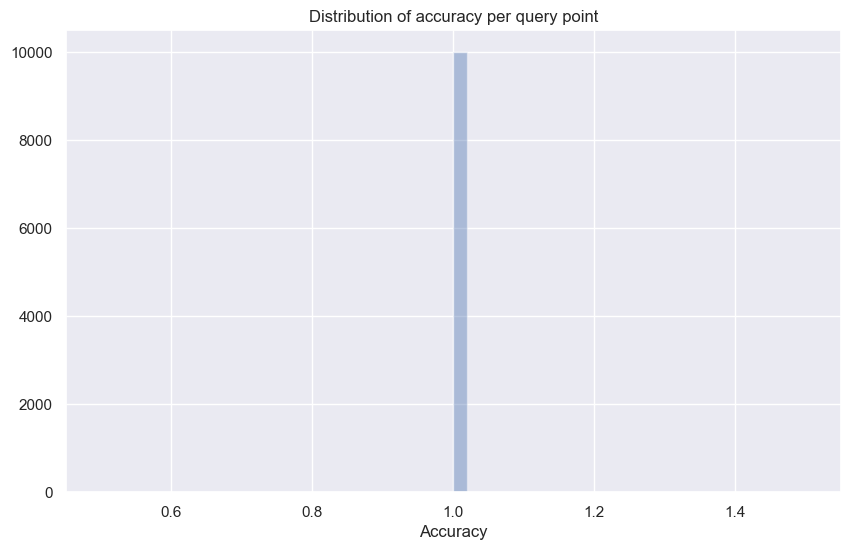

In [44]:
acc_index_accuracy_stats = accuracy_per_query_point(accurate_neighbors, tree_neighbors)
sns.distplot(acc_index_accuracy_stats, kde=False)
plt.title("Distribution of accuracy per query point")
plt.xlabel("Accuracy")
print(f"Average accuracy of {np.mean(acc_index_accuracy_stats)}")

In [45]:
%%time
fast_index = pynndescent.NNDescent(
    fmnist_train,
    n_neighbors=10,
    diversify_prob=1.0,
    pruning_degree_multiplier=0.5,
)
fast_index.prepare()

D:\Apps\anaconda3\Lib\site-packages\scipy\sparse\_index.py:146: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


CPU times: total: 18.7 s
Wall time: 7.88 s


In [46]:
%%time
fast_neighbors = fast_index.query(fmnist_test, epsilon=0.0)

CPU times: total: 219 ms
Wall time: 324 ms


C:\Users\binweiwu\AppData\Local\Temp\ipykernel_21544\3279176098.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fast_index_accuracy_stats, kde=False)


Average accuracy of 0.69685


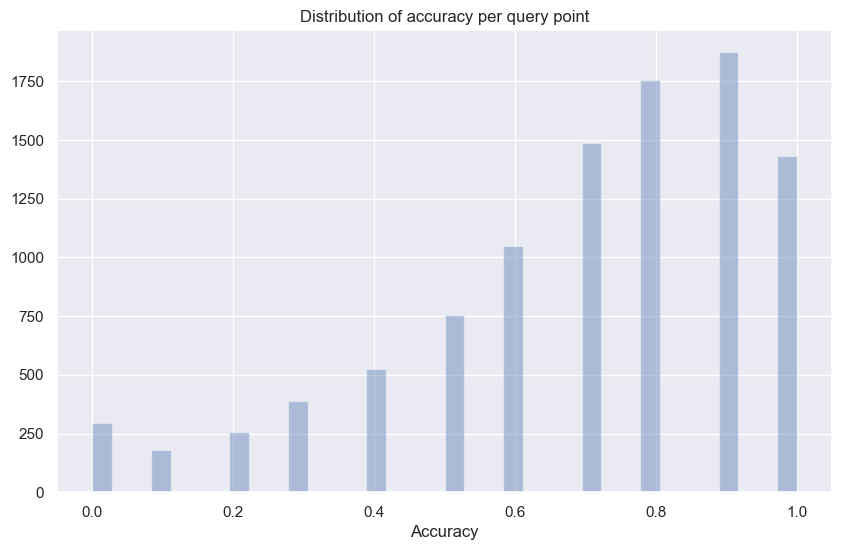

In [47]:
fast_index_accuracy_stats = accuracy_per_query_point(fast_neighbors, tree_neighbors)
sns.distplot(fast_index_accuracy_stats, kde=False)
plt.title("Distribution of accuracy per query point")
plt.xlabel("Accuracy")
print(f"Average accuracy of {np.mean(fast_index_accuracy_stats)}")

In [48]:
%%time
index = pynndescent.NNDescent(fmnist_train)

CPU times: total: 43.7 s
Wall time: 4.67 s


In [49]:
index.neighbor_graph

(array([[    0, 25719, 27655, ..., 38300,  4643,  7353],
        [    1, 42564, 37550, ..., 56311, 12169, 50358],
        [    2, 53513, 35424, ..., 16891, 29542, 40182],
        ...,
        [59997, 45348, 22272, ..., 58896, 53292, 11657],
        [59998, 17378,  8495, ...,  4389, 23426, 34912],
        [59999, 11912, 40600, ..., 31966, 45245, 58489]]),
 array([[   0.     , 1188.7826 , 1215.344  , ..., 1417.4388 , 1422.567  ,
         1424.7806 ],
        [   0.     , 1048.0482 , 1068.395  , ..., 1218.4166 , 1219.923  ,
         1222.1665 ],
        [   0.     ,  532.61993,  632.16534, ...,  885.45245,  886.3972 ,
          887.8125 ],
        ...,
        [   0.     , 1086.2596 , 1118.3738 , ..., 1303.3699 , 1306.9954 ,
         1308.5958 ],
        [   0.     ,  685.18243,  690.4209 , ...,  795.6589 ,  796.894  ,
          797.1349 ],
        [   0.     ,  884.41394,  886.4903 , ..., 1048.9224 , 1049.3502 ,
         1051.806  ]], dtype=float32))